# 1) Market Landscape: Price Distribution & Segment Dominance

This section examines the overall price structure of 5G smartphones (≥ ₹20,000) and identifies which price segments dominate the market. The goal is to characterize the distribution of prices, quantify the weight of each price band, and understand brand presence by segment.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

def rupee_fmt(x, pos):
    try:
        x = float(x)
    except (TypeError, ValueError):
        return ""
    if x >= 1e5:
        return f"₹{int(x/1000)}k"
    return f"₹{int(x)}"

rupee_formatter = FuncFormatter(rupee_fmt)

def draw_segment_lines(ax, boundaries, ymin=None, ymax=None, linestyle="--", linewidth=1):
    ymin = ymin if ymin is not None else ax.get_ylim()[0]
    ymax = ymax if ymax is not None else ax.get_ylim()[1]
    for b in boundaries:
        ax.vlines(b, ymin=ymin, ymax=ymax, linestyles=linestyle, linewidth=linewidth, alpha=0.6)


---
## Data Loading and Integrity Checks

This subsection loads the combined dataset and validates that the `price` field is numeric and within the expected analysis scope. Basic descriptive statistics are included to contextualize the subsequent plots.

In [4]:
df = pd.read_csv(DATA_PATH)

required_cols = {"brand", "price"}
missing = required_cols - set(df.columns)
assert not missing, f"Missing required columns: {missing}"

# Coerce price to numeric and drop non-numeric rows if any
df["price"] = pd.to_numeric(df["price"], errors="coerce")
before = len(df)
df = df.dropna(subset=["price"])
after = len(df)

print(f"Loaded rows: {before}, after dropping non-numeric price: {after}")
display(df[["brand", "price"]].describe(include="all"))

Loaded rows: 577, after dropping non-numeric price: 577


,brand,price
count,577,577.000000
unique,7,NaN
top,Samsung,NaN
freq,115,NaN
mean,NaN,33630.414211
std,NaN,22504.129048
min,NaN,20000.000000
25%,NaN,21999.000000
50%,NaN,24999.000000
75%,NaN,34990.000000


---
## Price Segment Definitions

Price ranges are segmented to reflect typical Indian market tiers:
- ₹20–30k
- ₹30–40k
- ₹40–60k
- ₹60k+

These bins enable straightforward comparisons of market concentration and brand positioning by segment.

In [5]:
import numpy as np
import pandas as pd

bins = [20000, 30000, 40000, 60000, np.inf]
labels = ["₹20–30k", "₹30–40k", "₹40–60k", "₹60k+"]

# Apply segmentation
df["price_segment"] = pd.cut(
    df["price"], bins=bins, labels=labels, right=False, include_lowest=True
)

segment_counts = df["price_segment"].value_counts().reindex(labels)
segment_share = (segment_counts / segment_counts.sum() * 100).round(1)

segment_table = pd.DataFrame({"count": segment_counts, "share_%": segment_share})
segment_table

,count,share_%
price_segment,,
₹20–30k,386,66.9
₹30–40k,94,16.3
₹40–60k,49,8.5
₹60k+,48,8.3


---
## Overall Price Distribution

This visualization depicts the count of models across the continuous price range. Segment boundaries are overlaid to show how models cluster relative to common price bands. Given the long flagship tail, an optional log-scaled variant is provided for clarity.

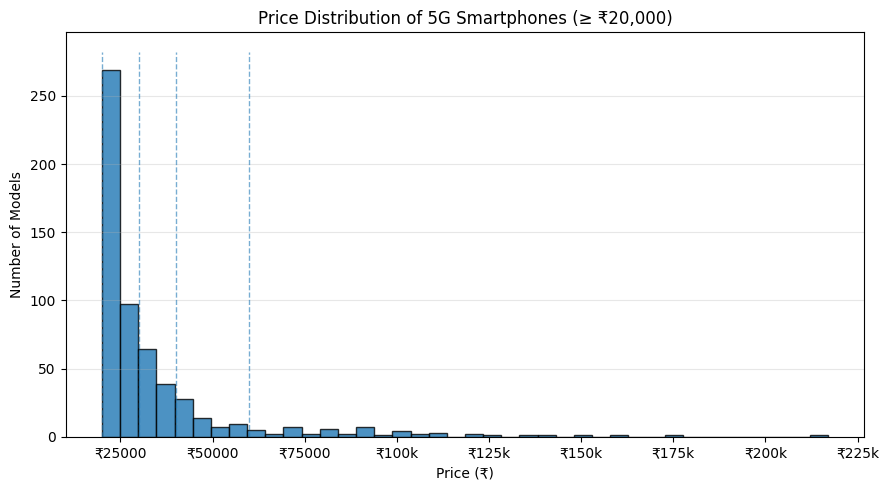

Saved: analysis/figures\price_distribution_hist.png


In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

def rupee_fmt(x, pos):
    try:
        x = float(x)
    except (TypeError, ValueError):
        return ""
    if x >= 1e5:
        return f"₹{int(x/1000)}k"
    return f"₹{int(x)}"

rupee_formatter = FuncFormatter(rupee_fmt)

def draw_segment_lines(ax, boundaries, ymin=None, ymax=None, linestyle="--", linewidth=1):
    ymin = ymin if ymin is not None else ax.get_ylim()[0]
    ymax = ymax if ymax is not None else ax.get_ylim()[1]
    for b in boundaries:
        ax.vlines(b, ymin=ymin, ymax=ymax, linestyles=linestyle, linewidth=linewidth, alpha=0.6)

price_min, price_max = df["price"].min(), df["price"].max()
bins_count = min(40, max(12, int((price_max - price_min) // 2500)))

fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(df["price"], bins=bins_count, edgecolor="black", alpha=0.8)

draw_segment_lines(ax, [20000, 30000, 40000, 60000])

ax.set_title("Price Distribution of 5G Smartphones (≥ ₹20,000)")
ax.set_xlabel("Price (₹)")
ax.set_ylabel("Number of Models")
ax.xaxis.set_major_formatter(rupee_formatter)
ax.grid(axis="y", alpha=0.3)
fig.tight_layout()

fig_path_hist = os.path.join(FIG_DIR, "price_distribution_hist.png")
plt.savefig(fig_path_hist, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_hist}")

---
## Segment Dominance

This subsection quantifies the number and share of models in each price segment. The objective is to identify where the market is densest and where offerings are relatively sparse.

,count,share_%
price_segment,,
₹20–30k,386,66.9
₹30–40k,94,16.3
₹40–60k,49,8.5
₹60k+,48,8.3


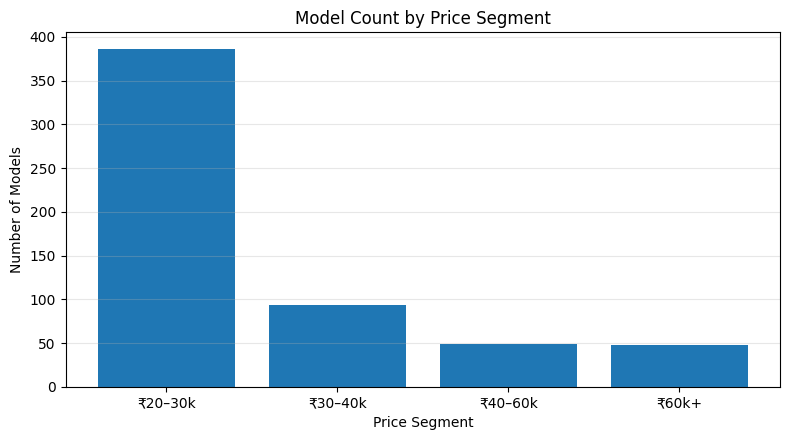

Saved: analysis/figures\segment_counts.png


In [9]:
display(segment_table)

# Bar chart of segment counts
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.bar(segment_counts.index.astype(str), segment_counts.values)
ax.set_title("Model Count by Price Segment")
ax.set_xlabel("Price Segment")
ax.set_ylabel("Number of Models")
ax.grid(axis="y", alpha=0.3)
fig.tight_layout()

fig_path_seg = os.path.join(FIG_DIR, "segment_counts.png")
plt.savefig(fig_path_seg, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_seg}")

---
# Summary & Insights — Market Landscape of 5G Smartphones (≥ ₹20,000)

### Overview
This analysis explores the overall pricing landscape of 5G smartphones in India above ₹20,000, based on 577 models scraped from Flipkart across seven major brands. The goal was to understand how the market is distributed across price segments and to identify dominant pricing tiers.

### Key Observations
- The dataset contains **577 smartphones** spanning **7 brands**, with **Samsung** contributing the highest number of listings (115 models).
- The **median price** sits around **₹25,000**, confirming that the market is heavily skewed toward the lower premium range.
- The price distribution shows a **strong right skew**, where most devices cluster in the ₹20k–₹35k region, followed by a gradual taper toward ultra-premium devices priced above ₹60k.
- Only a handful of listings cross the ₹1 lakh mark, representing true flagship or foldable models.

### Segment-Level Breakdown
| Price Segment | Model Count | Market Share | Segment Characterization |
|----------------|--------------|----------------|----------------------------|
| ₹20–30k | 386 | 66.9% | Core market — dominated by Realme, Vivo, Xiaomi, and Samsung’s upper midrange series. |
| ₹30–40k | 94 | 16.3% | Performance midrange — typically featuring higher refresh displays and stronger chipsets. |
| ₹40–60k | 49 | 8.5% | Affordable flagship zone — primarily OnePlus and upper Samsung A-series models. |
| ₹60k+ | 48 | 8.3% | True flagship territory — largely occupied by Google Pixel and Samsung Galaxy S / Fold series. |

### Interpretations
- The **₹20–30k price band** forms the absolute center of the Indian 5G smartphone ecosystem, accounting for over **two-thirds of all available models**.
- There is a **sharp drop-off beyond ₹40k**, showing that consumer demand and manufacturer supply both concentrate on affordability within the premium range.
- The **flagship segment (₹60k+)** remains a niche, accounting for less than 1 in 10 models — typically brand halo products, not volume drivers.
- The distribution confirms that the **Indian 5G market is price-sensitive and value-oriented**, rewarding brands that deliver strong performance within constrained budgets.

### Implications
- **For Consumers:** The ₹20–30k range offers the most variety and competition, representing the sweet spot for value seekers.
- **For Brands:** Establishing dominance in this segment is crucial for sustained visibility and volume. The data suggests that aggressive pricing in the lower premium range remains the most effective market strategy.
- **For Future Analysis:** These findings lay the groundwork for deeper exploration into brand-level positioning, spec-to-price relationships, and the trade-off between premium pricing and real-world value.

---